# BBM409: INTRODUCTION TO MACHINE LEARNING LABORATORY - ASSIGNMENT I

**Name:  Hakan AKYÜREK <br>
School Number: 21426553 <br>
Date:  06 / 11 / 2018 <br>
Subjects: non-weighted-k-Nearest Neighbor Classification, weighted-k-Nearest Neighbor Classification, Kernel Regression, Linear Regression** <br>

## Part 1 - THEORY QUESTIONS

### k-Nearest Neighbour Classification

#### Question 1

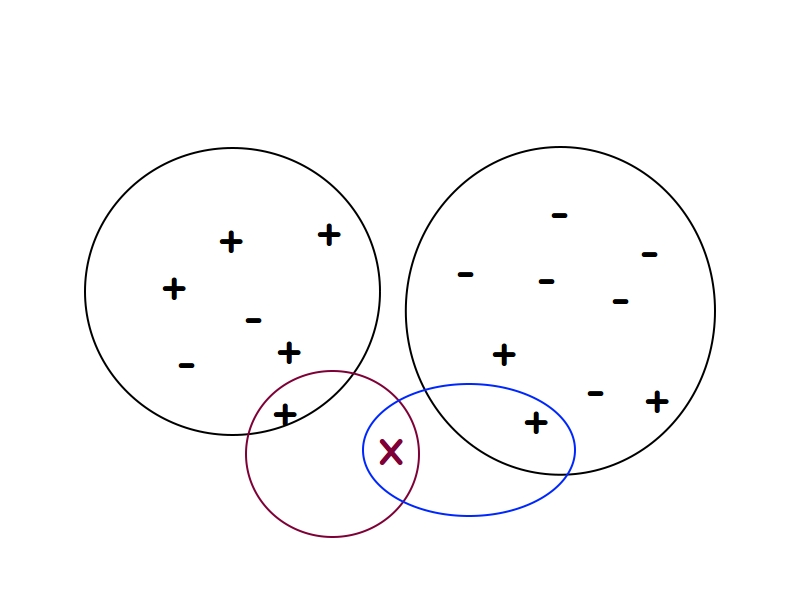




In the image above if both blue and red sets are positive, union of the would be positive as well.

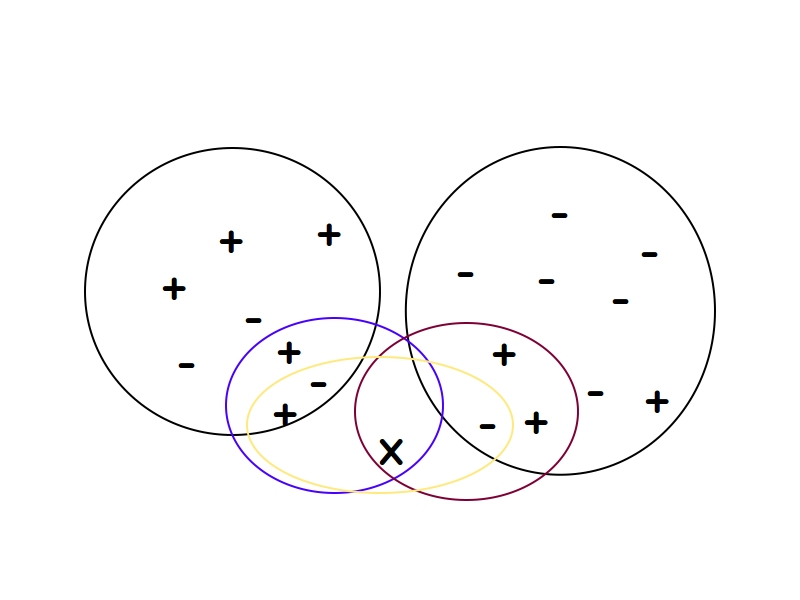


In the example above we can see that both blue and red sets are positive, but yellow set is negative.

#### Question 2

##### 2-a

k = 1. Algorithm will learn data best at when k is equal to 1, thus minimizing training error, because it will always choose itself in 1-NN.

##### 2-b

I have no idea about the first part.

K-Folds Cross validation is better in terms of performance not result or accuracy. When we use leave-one-out cross validation we will loop through the dataset n times, so we'll be performing the same operation n times. It has a $O(n)$ complexity while k-Folds has $O(1)$, constant complexity since we preform the same fuction limited times.

##### 2-c

If the k value selected is too low than it should have been, then our model will **overfit** the data given, being too simple to explaing the variance in tha data, thus increasing error rate.

If the k value selected is too high the it should have been, then out model will **underfit** the data given, being too detailed returning output more sensitive than we want, thus increasing the error rate as well. 

##### 2-d

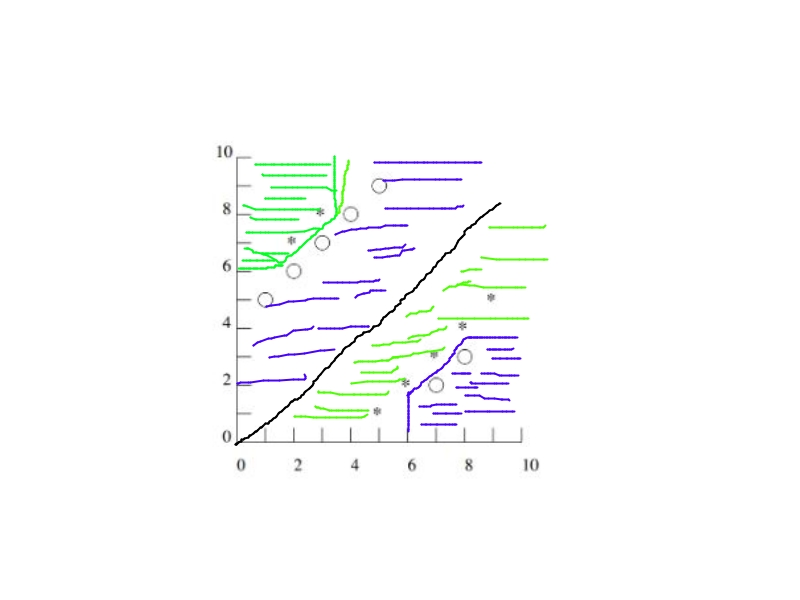

### Linear Regression

#### Question 1

X is $ 24 x 5 $, where the first column is all-ones. Y is an m-vector(23- vector), which represents the outputs in the training data. θ is an (n+1)-vector(6-vector).

#### Question 2

We need to use gradient descent since X will have $ 200001 \times 200001 $ dimentions and we will have to calculate $(X^T\times X)^{-1}$
This calculation will be expensive in resources and will consume much time. Closed form solution is the worse option.

#### Question 3

Say we have $ x_1 = length(0 - 10000) $ and $ x_2 = height(1 - 30) $. If we put these data to a graph our gradient descent will show a literally skewed elips instead of a more circular image. In a skewed elips it will take loads of iterations to find the global minimum and will take a lot of time. But if we scale the data as $ x_1 = \frac{length}{10000} $ and $ x_2 = \frac {height} {30} $ our elipses will become more circular, so our gradient descent will require fewer iterations and find a more direct path to find the global minimum, and perform better.

True: C

## Part 2 - BOOK RECOMMENDATION SYSTEM

The objective of the assignment given is to predict a rating for each user's each read book in test data and find an eror by substracting it from the actual value. Then finding the mean of these errors and returning it as an output.

There were of course memory and time problems. When filtered, 66691 ratings, which consist of 27000 books and 12700 users, were hard to process through and store. I found the solution to both of these problems by using many dictionaries in my algorithm, which increased the speed by at least a dozen times and does not even use 0.5Gb memory.

I will start explaining my approaches by starting from similarity methods.

### Similarity Methods

The algorithm needs to find similarities between test users and traing users to find most similar k people. But it does not mean algorithm needs to calculate similarities between each user in test and train data. I have changed to algorithm  a little bit to make it work faster. 

Instead of calculating every similarity between each user in trest and train data, my algorithm calculates the similarities between users, which gave a rating to a common book. My program checks if anyone in train data read that test user's book. It is done very quickly since I hold every reader of each book in a sepereate dicitonary, so I do not check if each user in train data read the book, I check if anyone read that book. 

If the conditions have been met, program starts calculating similarity. It approaches each similarity from a different angle.

#### Cosine Similarity

Cosine similarity is a measure of similarity that measures the cosine angle between two non-zero vectors. The result of this function is limited between [0, 1]. It reflects distances in direction, more specificly in positive space.

In cosine similarity my approach is calculating dot products first then then calculating norms and divisions in a seperate function. It is a straightforward function with low complexity, but it requires a lot of computational power in dense data.

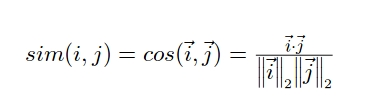

#### Correlation Similarity

Correlation is the covariance of the two variables divided by the product of their standard deviations. The results of this similarity method can be positive as well as negative.

While giving the most accurate results, the lowest mae, in my tests, results of the formula below is rather easy to calculate. 

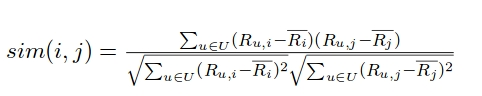

Where I calculate the difference between users ratings and the average of the common book's ratings.

#### Adjusted Cosine Similarity

Adjusted cosine based similarity is a more sensitive version of cosine base similarity. Is is supposed to reflect the differences better than cosine based similarity. 

With the worst results in my tests, results of the formula below is as fast as correlation based similarity. 

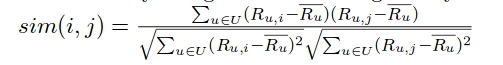

Where I calculate the difference between users ratings and those user's mean of ratings.

### My Approach to kNN Algorithm

The kNN algorithm is supposed to predict a rating for each book that each user in test data read. Then finding the error rate, which is $ actual rating - predicted rating $, for those books and finding MAE is my assingment.

Finding similar users is rather straightforward, I implemented the formulas as efficent as possible. But in similarity calculation I did something different: I only calculated similarities between users that read a common book. That being said, not calculating similarities between users that has no actual similarity at all, which have 0 similarity between each other, accelerated my programs speed tremendously. To achieve that I used two different dictionaries:
<ol>
  <li>User dictionary: Holds ratings that each and every user gave.</li>
  <li>Book dictionary: Holds ratings that each and every book got.</li>
</ol>
Thanks to the nature of dictionaries, my algorithm can access the data needed almost in constant time. These dictionaries hold data about training data, test data on the other hand has its own dictionaries ready for usage.

After finding similarities, predicting ratings for each book that each test user read is the next job. While predicting ratings for a book that a user read, algorithm checks if the book has atleast t readers. Books that have readers enough to pass the threshold, have their prediction calculated according to most k similar users in training data. Those do not pass are threaded differently.

In that scope, I am able to predict a rating for those books that I have data about. If a test user reads a book, which I don't have any data about, my program looks at that user's ratings. The predicted value is mean of that user's ratings. This needs to be done in order to predict since taking the mean of all books ratings in training data would be incorrect.

#### Threshold

The threshold logic is defined as if a book does not have a certain number of readers, its predicted rating would not be correct at all. Considering that, the predicted rating for those books are mean of the ratings given to those books.

### My Approach to wkNN Algorithm

In weighted k nearest neighbours algorithm, the objective is to predict better by giving a weight to most similar k users' ratings. The weight is applied only if the book has passed the threshold.

The weight given should prioritize more similar users. In other words, users that have less distance to test user should have more weight in their rating since they are closer, and users that have more distance should have less weight since they are farther. 

Considering that, in my algorithm I used squared distance weighting. But in that case there is two simple problems, which are division by zero and negative similarities. Since the distance may be zero, applying a small constant to "e"(I have use 0.001 in my algorithm) can be counted as solution for division by zero. To solve the negative similarities problem, algorithm has to take the square of the distance. If it doesn't, some predictions may be below zero and can effect the result of the algorithm.

$ w_i = \frac{1}{(d_i)^2 + e} $

In [ ]:
ratingSum += userRatingMap[simUser[0]][book] * (1 / ((1 - tempsimData[user][simUser[0]]) ** 2 + 0.001))

### Performance Analysis

When performance anlysis is done in the algorithm, one can see that it works almost at top efficiency, and with pretty good mae.

In terms of memory performance, algorithm uses at most 300-400 Mb space in ram.

In terms of time complexity, algorithm can be cosidered in $O(n^3)$ complexity, and the most time consuming part is similarity calculations. But considering how algorithm works, it only calculates similarities between users who read a common book and rated it, it works much more faster. I also used some sort of cache in my own terms. I have stored some values like a persons norm, books or users average in dicitonaries to quickly access them if they are needed again and avoid recalculating them. This has almost double the calculation speed.

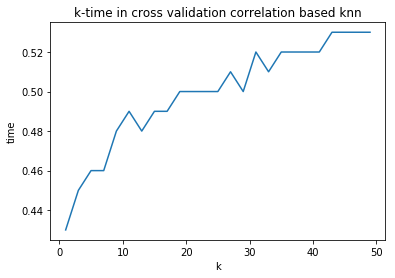

In [11]:
import matplotlib.pyplot as plt

x = []
y = []

with open("./knnCor") as f:
    next(f)
    data = f.read()
    

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[3]))

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("k-time in cross validation correlation based knn")    
ax1.set_xlabel('k')
ax1.set_ylabel('time')

ax1.plot(x,y)

plt.show()


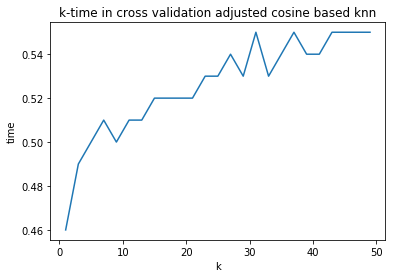

In [12]:
import matplotlib.pyplot as plt

x = []
y = []

with open("./knnACos") as f:
    next(f)
    data = f.read()
    

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[3]))

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("k-time in cross validation adjusted cosine based knn")    
ax1.set_xlabel('k')
ax1.set_ylabel('time')

ax1.plot(x,y)


plt.show()


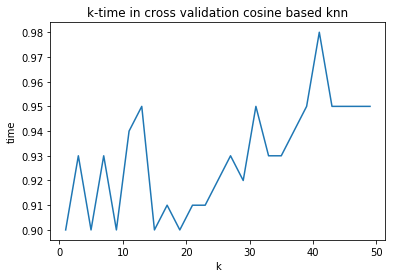

In [10]:
import matplotlib.pyplot as plt

x = []
y = []

with open("./knnCos") as f:
    next(f)
    data = f.read()
    

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[3]))

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("k-time in cross validation cosine based knn")    
ax1.set_xlabel('k')
ax1.set_ylabel('time')

ax1.plot(x,y)

plt.show()


The graphs above represent time passed, in seconds, from similarity calculation to returning mae result, they do not include data file reading. We can clearly see that as k increases the prediction number so the error number increase. Since these two increase the time is consumed is more aswell. The test and training data size is all same in these tests: 1/5 of thraining data used as a test data.

In worst case, my algorithm will work worse than traditional matrix way. But in order that to happen data size needs to be tremendous. But with the given test data and rating data, it works a dozen times faster

The reason I chose dictionaries to numpy matrices is because the data given is extremely sparse, and because of the sparsity of the data it does unnecessary calculations a lot. These reason make working with matrices a bad experience in this assignment.

The reason of why time increases by k value is rather simple: as the k value increases, the number of predictions algorithm has to make increases as well, thus increasing the time required.

### Result Analysis

When the results are compared in non-weighted knn algorithm, correlation based isimilarity is by far superior to others. While having the fastest execution time, correlation based similarity also returns the best results in non-weighted knn.

Each similarity technique has it's best value at k = 3. The results get wronger by the increasing k value. 

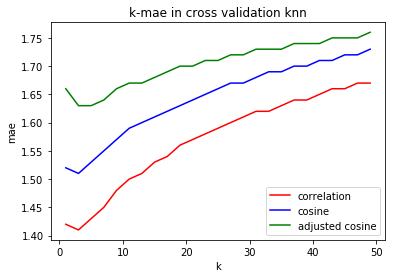

In [13]:
import matplotlib.pyplot as plt

x = []
y = []

with open("./knnCor") as f:
    next(f)
    data = f.read()

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[2]))
with open("./knnCos") as f:
    next(f)
    data = f.read()

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[2]))
with open("./knnACos") as f:
    next(f)
    data = f.read()

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[2]))

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("k-mae in cross validation knn")    
ax1.set_xlabel('k')
ax1.set_ylabel('mae')

ax1.plot(x[0:25],y[0:25], c='r', label='correlation')
ax1.plot(x[25:50],y[25:50], c='b', label='cosine')
ax1.plot(x[50:75],y[50:75], c='g', label='adjusted cosine')

leg = ax1.legend()

plt.show()


When we compare the weighted-knn results, we can see that as k increases cosine based similarity starts to give better results than other two. While the best results are given by correlation based similarity when k = 3, it was the same in non-weighted knn, if higher k values are desired cosine based similarity should be chosen.

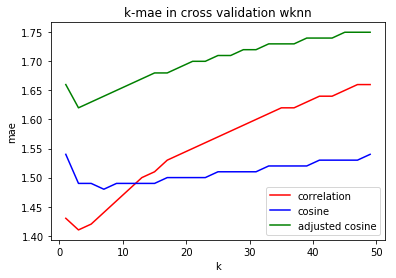

In [14]:
import matplotlib.pyplot as plt

x = []
y = []

with open("./wknnCor") as f:
    next(f)
    data = f.read()

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[2]))
with open("./wknnCos") as f:
    next(f)
    data = f.read()

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[2]))
with open("./wknnACos") as f:
    next(f)
    data = f.read()

    data = data.split('\n')
    data = data[:-1]

    for line in data:
        line = line.split(' ')
        x.append(int(line[0]))
        y.append(float(line[2]))

fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("k-mae in cross validation wknn")    
ax1.set_xlabel('k')
ax1.set_ylabel('mae')

ax1.plot(x[0:25],y[0:25], c='r', label='correlation')
ax1.plot(x[25:50],y[25:50], c='b', label='cosine')
ax1.plot(x[50:75],y[50:75], c='g', label='adjusted cosine')

leg = ax1.legend()

plt.show()

Adding the weight does not affect correlation and adjusted cosine based similarities that much. Precisely sepaking, adding weight to those only lowers their result maximum of 0.01.

The lowest mae my algorithm returned is with correlation similarity in bot weighted and non-weighted way with k equals to three. When k value increases the number of users that are added to prediction increases as well, which actually should be good in a dense dataset. But in this case, where the dataset is amazingly sparse, the prediction that my algorithm makes will go closer to 0 as k value increases, thus increasing the error rate if the actual rating is not 0 or close to 0.


### References

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.700.4656&rep=rep1&type=pdf<br>
http://www10.org/cdrom/papers/519/node14.html<br>
http://www10.org/cdrom/papers/519/node13.html<br>
https://brenocon.com/blog/2012/03/cosine-similarity-pearson-correlation-and-ols-coefficients/<br>
https://matplotlib.org/<br>
https://en.wikibooks.org/wiki/LaTeX/List_Structures<br>
http://www.wikizeroo.net/index.php?q=aHR0cHM6Ly9lbi53aWtpcGVkaWEub3JnL3dpa2kvQ29zaW5lX3NpbWlsYXJpdHk<br>
https://github.com/mGalarnyk/datasciencecoursera/blob/master/Stanford_Machine_Learning/Week2/week2quiz1LinearRegressionMultipleVariables.md <br>
https://www.coursera.org/lecture/machine-learning/gradient-descent-in-practice-i-feature-scaling-xx3Da <br>
https://github.com/mGalarnyk/datasciencecoursera/tree/master/Stanford_Machine_Learning <br>
https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76 <br>